In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
#### salimt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-08-06 16:25:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-06 16:25:43 (120 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [99]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words/2, activation='relu', activity_regularizer=l1(0.001)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_100 (Bidirecti (None, 10, 300)           301200    
_________________________________________________________________
dropout_56 (Dropout)         (None, 10, 300)           0         
_________________________________________________________________
bidirectional_101 (Bidirecti (None, 300)               541200    
_________________________________________________________________
dense_86 (Dense)             (None, 1605)              483105    
_________________________________________________________________
dense_87 (Dense)             (None, 3211)              5156866   
Total params: 6,803,471
Trainable params: 6,803,471
Non-trainable params: 0
___________________________________________

In [100]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 15ms/step - loss: 6.8579 - accuracy: 0.0227
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4839 - accuracy: 0.0270
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2779 - accuracy: 0.0345
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0951 - accuracy: 0.0402
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 5.8744 - accuracy: 0.0491
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 5.6233 - accuracy: 0.0640
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 5.3698 - accuracy: 0.0786
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 5.0966 - accuracy: 0.0898
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 4.8074 - accuracy: 0.1061
Epoch 10/100
484/484 [==============================] - 7s 15ms/step - loss: 4.476

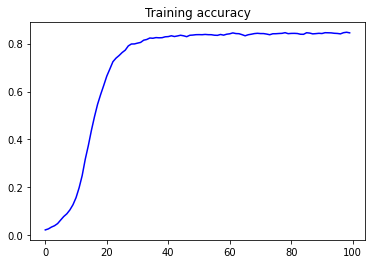

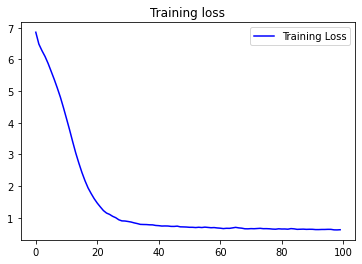

In [101]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [102]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope on nature's loving loving parts ' her way ' place ' her head alone note do strive be die so young in know it not in me well lived is it did love are still my grief day add to spend spend clearer quite hate dyed grow new of know new love of mine eyes it live you still you best in told i do not press see thee born ' doth take gone my dear state to approve her way ' show me groan age prove true true sight doth words can write to me as mine eye shall
